In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [2]:
# 2. Đọc file csv và gắng index với giá Price
df = pd.read_csv('MBB.csv')
df=df.reset_index()['Price']

In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df).reshape(-1,1))

In [4]:
# 4. Chia train test
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [5]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [8]:
# 8. Define LSTM Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [9]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 [==============================] - 3s 92ms/step - loss: 0.0626 - val_loss: 0.3775
Epoch 2/100
11/11 [==============================] - 0s 42ms/step - loss: 0.0137 - val_loss: 0.1178
Epoch 3/100
11/11 [==============================] - 0s 34ms/step - loss: 0.0049 - val_loss: 0.0143
Epoch 4/100
11/11 [==============================] - 0s 35ms/step - loss: 0.0012 - val_loss: 0.0055
Epoch 5/100
11/11 [==============================] - 0s 35ms/step - loss: 8.9303e-04 - val_loss: 0.0072
Epoch 6/100
11/11 [==============================] - 0s 35ms/step - loss: 7.6422e-04 - val_loss: 0.0066
Epoch 7/100
11/11 [==============================] - 0s 35ms/step - loss: 6.8356e-04 - val_loss: 0.0053
Epoch 8/100
11/11 [==============================] - 0s 35ms/step - loss: 7.5300e-04 - val_loss: 0.0053
Epoch 9/100
11/11 [==============================] - 0s 36ms/step - loss: 6.9418e-04 - val_loss: 0.0051
Epoch 10/100
11/11 [==============================] - 0s 36ms/step - loss: 6.492

11/11 [==============================] - 0s 32ms/step - loss: 2.0829e-04 - val_loss: 0.0018
Epoch 80/100
11/11 [==============================] - 0s 31ms/step - loss: 2.0713e-04 - val_loss: 0.0017
Epoch 81/100
11/11 [==============================] - 0s 33ms/step - loss: 2.0643e-04 - val_loss: 0.0016
Epoch 82/100
11/11 [==============================] - 0s 34ms/step - loss: 1.8929e-04 - val_loss: 0.0015
Epoch 83/100
11/11 [==============================] - 0s 33ms/step - loss: 2.1095e-04 - val_loss: 0.0014
Epoch 84/100
11/11 [==============================] - 0s 34ms/step - loss: 2.3204e-04 - val_loss: 0.0016
Epoch 85/100
11/11 [==============================] - 0s 34ms/step - loss: 1.8757e-04 - val_loss: 0.0015
Epoch 86/100
11/11 [==============================] - 0s 34ms/step - loss: 1.8744e-04 - val_loss: 0.0014
Epoch 87/100
11/11 [==============================] - 0s 35ms/step - loss: 1.9046e-04 - val_loss: 0.0014
Epoch 88/100
11/11 [==============================] - 0s 33ms/step -

In [10]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

1/1 [==============================] - 0s 42ms/step


In [11]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [12]:
train_size1 = int(0.6 * len(df))
test_size1 = int(0.3 * len(df))

train_data1 = df[:train_size1]
test_data1 = df[train_size1:train_size1+test_size1]
val_data1 = df[train_size1+test_size1:]

x_test1 = np.array(test_data1.index).reshape(-1, 1)
y_test1 = np.array(test_data1)

x_val1 = np.array(val_data1.index).reshape(-1, 1)
y_val1 = np.array(val_data1)

In [13]:
# 12. Đánh giá độ chính xác thuật toán
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val1)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test1)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

#MAPE
valid_mape = np.mean(np.abs((y_val1 - y_pred_val) / y_val1)) * 100
test_mape = np.mean(np.abs((y_test1 - y_pred) / y_test1)) * 100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

#MAE
valid_mae = np.mean(np.abs(y_pred_val - y_val1))
test_mae = np.mean(np.abs(y_pred - y_test1))
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation RMSE: 1181.235031965619
Testing RMSE: 3709.3675021568924
Validation MAPE: 5.026854518824011
Testing MAPE: 12.835432895399368
Validation MAE: 860.7606009114584
Testing MAE: 2894.006309942951


In [14]:
# 13. Dự báo 30 ngày tiếp theo
x_input=val_data[len(val_data)-time_step:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=99
i=0
while(i<30):

    if(len(temp_input)>99):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


0 day input [0.48897256 0.50295199 0.49130246 0.44703426 0.46800341 0.47732303
 0.47499313 0.4610137  0.50295199 0.50062208 0.51227161 0.51460152
 0.51460152 0.51227161 0.51460152 0.51460152 0.51460152 0.52625104
 0.56818934 0.57517905 0.57750896 0.58216877 0.56119962 0.57517905
 0.54489028 0.54722019 0.53091085 0.53557066 0.51926133 0.52159123
 0.52392114 0.51693142 0.50295199 0.49596227 0.50295199 0.51460152
 0.5076118  0.54489028 0.53091085 0.51460152 0.50994171 0.48897256
 0.46800341 0.46800341 0.48664265 0.47499313 0.4633436  0.47033332
 0.47499313 0.48431275 0.49363237 0.49130246 0.47965294 0.46567351
 0.49363237 0.47732303 0.47732303 0.47033332 0.47266322 0.47499313
 0.47499313 0.49130246 0.50062208 0.50295199 0.51693142 0.51460152
 0.51460152 0.53557066 0.53790057 0.54023047 0.52625104 0.53091085
 0.53091085 0.53790057 0.53557066 0.52858095 0.51693142 0.51460152
 0.50994171 0.5076118  0.50994171 0.5052819  0.51460152 0.51460152
 0.51926133 0.52159123 0.52392114 0.51227161 0.507

7 day output [[0.59685785]]
8 day input [0.50295199 0.50062208 0.51227161 0.51460152 0.51460152 0.51227161
 0.51460152 0.51460152 0.51460152 0.52625104 0.56818934 0.57517905
 0.57750896 0.58216877 0.56119962 0.57517905 0.54489028 0.54722019
 0.53091085 0.53557066 0.51926133 0.52159123 0.52392114 0.51693142
 0.50295199 0.49596227 0.50295199 0.51460152 0.5076118  0.54489028
 0.53091085 0.51460152 0.50994171 0.48897256 0.46800341 0.46800341
 0.48664265 0.47499313 0.4633436  0.47033332 0.47499313 0.48431275
 0.49363237 0.49130246 0.47965294 0.46567351 0.49363237 0.47732303
 0.47732303 0.47033332 0.47266322 0.47499313 0.47499313 0.49130246
 0.50062208 0.50295199 0.51693142 0.51460152 0.51460152 0.53557066
 0.53790057 0.54023047 0.52625104 0.53091085 0.53091085 0.53790057
 0.53557066 0.52858095 0.51693142 0.51460152 0.50994171 0.5076118
 0.50994171 0.5052819  0.51460152 0.51460152 0.51926133 0.52159123
 0.52392114 0.51227161 0.5076118  0.51460152 0.51693142 0.52625104
 0.52625104 0.53324076 

15 day output [[0.6436118]]
16 day input [0.51460152 0.52625104 0.56818934 0.57517905 0.57750896 0.58216877
 0.56119962 0.57517905 0.54489028 0.54722019 0.53091085 0.53557066
 0.51926133 0.52159123 0.52392114 0.51693142 0.50295199 0.49596227
 0.50295199 0.51460152 0.5076118  0.54489028 0.53091085 0.51460152
 0.50994171 0.48897256 0.46800341 0.46800341 0.48664265 0.47499313
 0.4633436  0.47033332 0.47499313 0.48431275 0.49363237 0.49130246
 0.47965294 0.46567351 0.49363237 0.47732303 0.47732303 0.47033332
 0.47266322 0.47499313 0.47499313 0.49130246 0.50062208 0.50295199
 0.51693142 0.51460152 0.51460152 0.53557066 0.53790057 0.54023047
 0.52625104 0.53091085 0.53091085 0.53790057 0.53557066 0.52858095
 0.51693142 0.51460152 0.50994171 0.5076118  0.50994171 0.5052819
 0.51460152 0.51460152 0.51926133 0.52159123 0.52392114 0.51227161
 0.5076118  0.51460152 0.51693142 0.52625104 0.52625104 0.53324076
 0.54256038 0.54023047 0.52392114 0.53091085 0.53324076 0.54573864
 0.56110525 0.56707448

24 day output [[0.66530615]]
25 day input [0.54722019 0.53091085 0.53557066 0.51926133 0.52159123 0.52392114
 0.51693142 0.50295199 0.49596227 0.50295199 0.51460152 0.5076118
 0.54489028 0.53091085 0.51460152 0.50994171 0.48897256 0.46800341
 0.46800341 0.48664265 0.47499313 0.4633436  0.47033332 0.47499313
 0.48431275 0.49363237 0.49130246 0.47965294 0.46567351 0.49363237
 0.47732303 0.47732303 0.47033332 0.47266322 0.47499313 0.47499313
 0.49130246 0.50062208 0.50295199 0.51693142 0.51460152 0.51460152
 0.53557066 0.53790057 0.54023047 0.52625104 0.53091085 0.53091085
 0.53790057 0.53557066 0.52858095 0.51693142 0.51460152 0.50994171
 0.5076118  0.50994171 0.5052819  0.51460152 0.51460152 0.51926133
 0.52159123 0.52392114 0.51227161 0.5076118  0.51460152 0.51693142
 0.52625104 0.52625104 0.53324076 0.54256038 0.54023047 0.52392114
 0.53091085 0.53324076 0.54573864 0.56110525 0.56707448 0.57120812
 0.57430178 0.5858801  0.59221202 0.59685785 0.60516787 0.60964787
 0.61415887 0.6181517

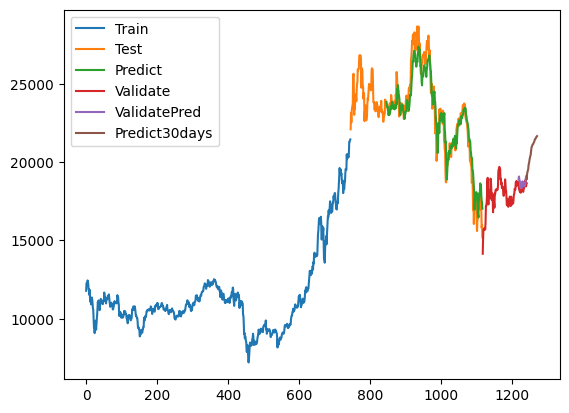

In [15]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()